## Dragon Real Estate Price Predictor

In [1]:
import pandas as pd 

In [2]:
hausing = pd.read_csv("data.csv")

In [3]:
hausing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
hausing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
hausing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
hausing.describe()
hausing.shape

(506, 14)

In [7]:
%matplotlib inline

In [8]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

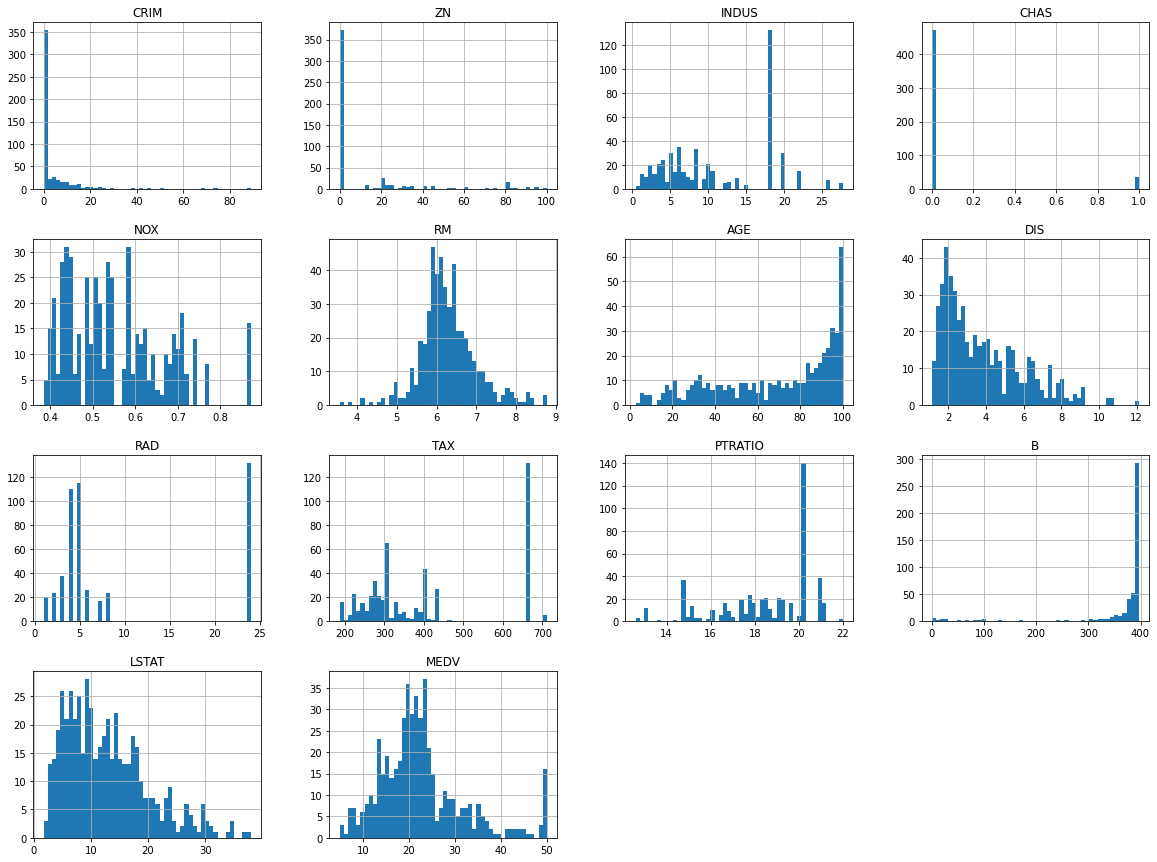

In [9]:
hausing.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

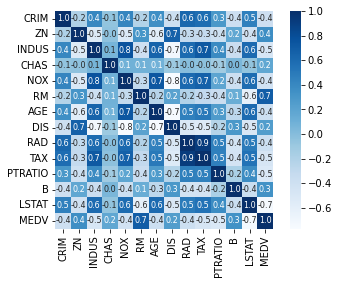

In [10]:
import seaborn as sns
correlation = hausing.corr()

# constructing a heatmap to understand the correlation
plt.figure.Figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## Train - Test Splitting

In [11]:
 import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(hausing, 0.2)

In [13]:
# print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hausing, test_size = 0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hausing, hausing['CHAS']):
    strat_train_set = hausing.loc[train_index]
    strat_test_set = hausing.loc[test_index]

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
strat_train_set.shape

(404, 14)

In [19]:
hausing = strat_train_set.copy() # made hausing as train set to see correlation and all other only work on train set 
 # so that test set remains unseen and untouched

In [20]:
hausing.shape

(404, 14)

## Looking for Correlations

In [21]:
corr_matrix = hausing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680999
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

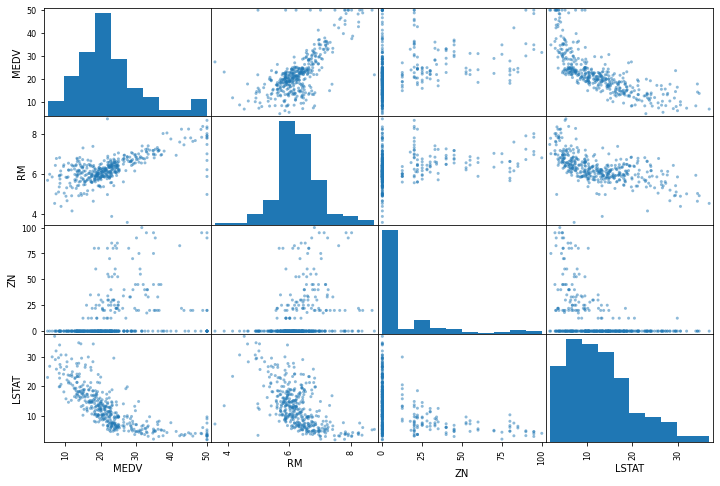

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(hausing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

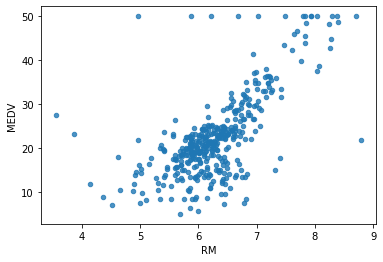

In [23]:
hausing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

## Trying out Attribute combination

In [24]:
hausing['TAXRM'] = hausing['TAX']/hausing['RM']

In [25]:
hausing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = hausing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680999
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527542
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

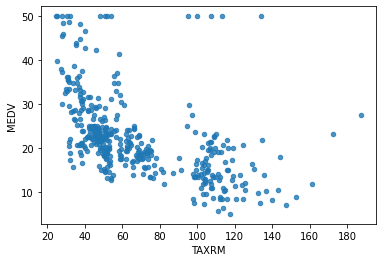

In [27]:
hausing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [28]:
hausing = strat_train_set.drop('MEDV', axis=1)
# droping price column and saving it as hausing_labels
# note : we took  labels from  stratified suffeled split to fit in model later
hausing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

In [29]:
median = hausing['RM'].median()

In [30]:
hausing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(hausing)

SimpleImputer(strategy='median')

In [32]:
X = imputer.transform(hausing)
hausing_tr = pd.DataFrame(X, columns=hausing.columns)
hausing_tr.shape


(404, 13)

In [33]:
hausing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


# Scikit-learn Design

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer
It has a fit method and transform method
Fit method - Fits the dataset and calculates internal parameters
    
2. Transformers - transform method takes input and returns output based on the
learnings from fit (). It also has a convenience function called fit_transform(), which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and
predict) are two common functions. It also gives score() function which will evaluate the predictions.
They will take numpy array as input. 

## Feature Scaling 

We need this becouse some general ML algorithm works and performs well when our Nummerical attributes are in same scale.
in our case some features attributes are in rage of 0 to 8 (RM) and some are in rage of 0 to 50 (MEDV).
we need to scale them so their range get same, for that we use Feature scaling.

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization) 
     (value - min) / (max - min) 
     
     Sklearn provides a class called MinMaxScaler for this. The range will be: 0 - 1

2. Standardization 
     (value - mean) /std  
     
     Sklearn provides a class called StandardScaler for this.
     we will use this coz, unlike min-max scaling std scaling do not depend on all value. e.g min and max can change with error      value but std will remain const.

## Creating a Pipelines

we have done some preprocessing before for learning purpuse, but in real we need to fit all in our pipeline (after importing data) imputer and all should be in pipeline to automate the Process  

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # we can add as many we need to process our data
    ('std_scaler', StandardScaler()),
])

In [35]:
hausing_num_tr = my_pipeline.fit_transform(hausing)
# we have fit and transform in hausing coz we made hausing as train set earlier. 
# This is our input and it's numpy array becouse our model will take numpy as input thats why we dont make pandas dataframe

In [36]:
hausing_num_tr.shape

(404, 13)

## Selecting a desiered model for Dragon Real Estates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression() 
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(hausing_num_tr, hausing_labels)

RandomForestRegressor()

## Cheaking our Model Prediction
cheaking only 5 values here. 

In [38]:
some_data = hausing.iloc[:5] # took some data from train set

In [39]:
some_labels = hausing_labels.iloc[:5] # took same corresponding labels 

In [40]:
prepared_data = my_pipeline.transform(some_data) # we need to prepare data using pipeline before feeding it to model

In [41]:
model.predict(prepared_data) # predicting labels 

array([22.391, 25.023, 16.491, 23.314, 23.519])

In [42]:
list(some_labels)  # to compare with predicted labels 

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model
We are taking whole training set here. e.g (hausing_labels, hausing_prediction)
using mean squared errors and root mean squared errors

In [43]:
from sklearn.metrics import mean_squared_error
hausing_prediction = model.predict(hausing_num_tr)
mse = mean_squared_error(hausing_labels, hausing_prediction)
rmse = np.sqrt(mse)

In [44]:
rmse

1.2149750527121415

## Using better evaluation technique - Cross Validation

In [45]:
# 1 2 3 4 5 6 7 8 9 10  (  Train data groups equally distributed random data points)
# we take 1st data set for test and use other 9 set to train then we take 2nd set and train with other 9 set and so on ...

from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, hausing_num_tr, hausing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
#rmse_scores

In [47]:
# to print all data togather we made small function
def print_scores(scores):
    print("Scores : " , scores)
    print("Mean : ", scores.mean())
    print("Standrad deviation : ", scores.std()) 
# score is mean +- std  e.g (3.49 +- 0.76)

In [48]:
print_scores(rmse_scores)

Scores :  [2.88228343 2.66384282 4.31084278 2.68961679 3.56533062 2.63956762
 5.06327288 3.30010814 3.31132019 2.92643179]
Mean :  3.3352617056096285
Standrad deviation :  0.7560756506356967


## Saving the Model

In [49]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on test data

In [50]:
# we did this before for train data set. process wiil be same as before. 

X_test = strat_test_set.drop("MEDV", axis=1) 
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [51]:
#print(final_predictions) # to compare data value

In [52]:
#print(list(Y_test))  # to compare data value

In [53]:
final_rmse

2.937519950704047

## Note: 
this model performs well becouse : 
1) we took small data set 
2) we used only 3 models to compare
3) we did not perform fine tunning 

## Using the Model

In [54]:
# we are loading this model in other file using this commands. 

from joblib import dump, load
import numpy as np
model=load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]]) # this is our sample data copied from code: prepared_data[0]

model.predict(features) # this will return price(lables) for given inputs(features) using our model. 

array([22.391])